# Case 10: Backtesting Investment Strategies (US Stocks)

## Importing the Data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
df = pd.read_csv('dji.csv', parse_dates = ['Date'], index_col = 'Date')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
Open         3333 non-null float64
High         3333 non-null float64
Low          3333 non-null float64
Close        3333 non-null float64
Adj Close    3333 non-null float64
Volume       3333 non-null int64
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,16293.111674,16383.927760,16196.740400,16296.038883,16296.038883,2.127821e+08
std,5527.824349,5539.255714,5514.553084,5527.425888,5527.425888,1.247230e+08
min,6547.009766,6709.609863,6469.950195,6547.049805,6547.049805,8.410000e+06
25%,12204.459961,12275.339844,12105.849609,12207.169922,12207.169922,1.156300e+08
50%,15306.019531,15357.400391,15229.019531,15303.099609,15303.099609,1.933400e+08
75%,19161.250000,19225.289062,19123.380859,19173.980469,19173.980469,2.782400e+08
max,29440.470703,29568.570312,29406.750000,29551.419922,29551.419922,2.190810e+09


In [142]:
dji = df.loc['2010-01-01':'2020-03-01','Close'].to_frame()

In [27]:
stocks = pd.read_csv('const_prices.csv', parse_dates = ['Date'], index_col = 'Date').loc['2010-01-01':'2020-03-01']

In [32]:
df = pd.concat([dji, stocks], axis = 1).rename(columns = {'Close': 'DJI'})

In [91]:
more_info = pd.read_csv('const.csv')

In [90]:
more_info

,Company,Exchange,Symbol,Industry,Date_Added,Ticker
0,3M,NYSE,MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,AXP,Financial services,1982-08-30,AXP
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,AMGN
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,AAPL
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,BA
5,Caterpillar Inc.,NYSE,CAT,Construction and Mining,1991-05-06,CAT
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,CVX
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,CSCO
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,KO
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,DOW


## Data Visualization & Returns

In [39]:
norm = df.div(df.iloc[0]).mul(100)

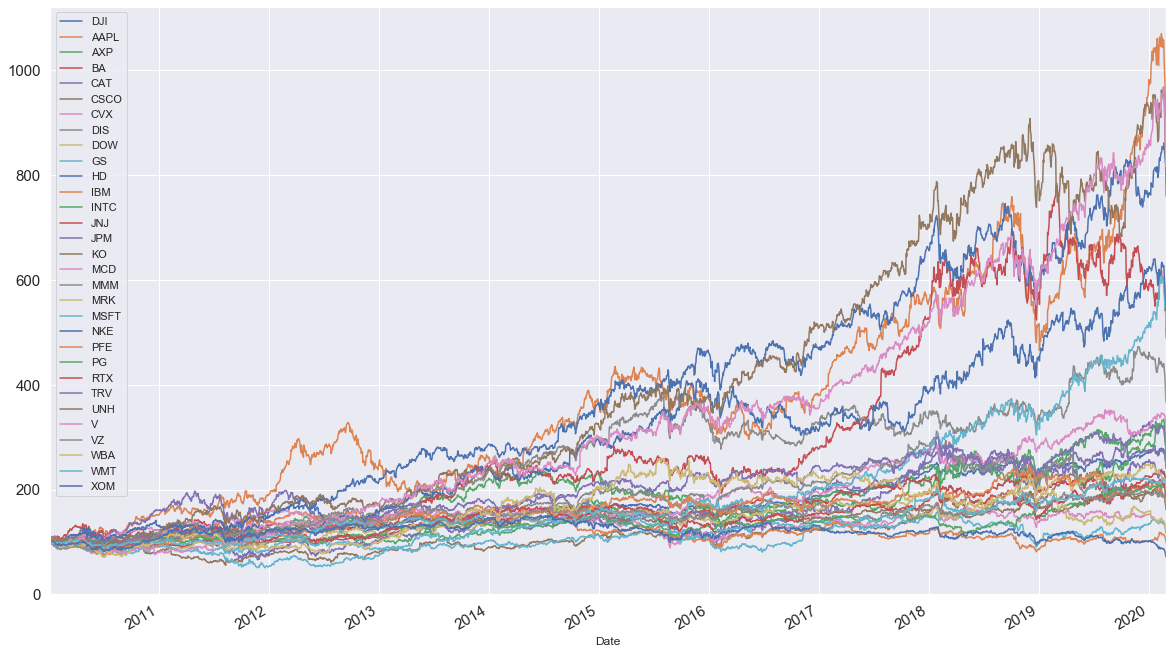

In [49]:
sns.set()
norm.plot(figsize = (20,12),fontsize = 15)
plt.legend()

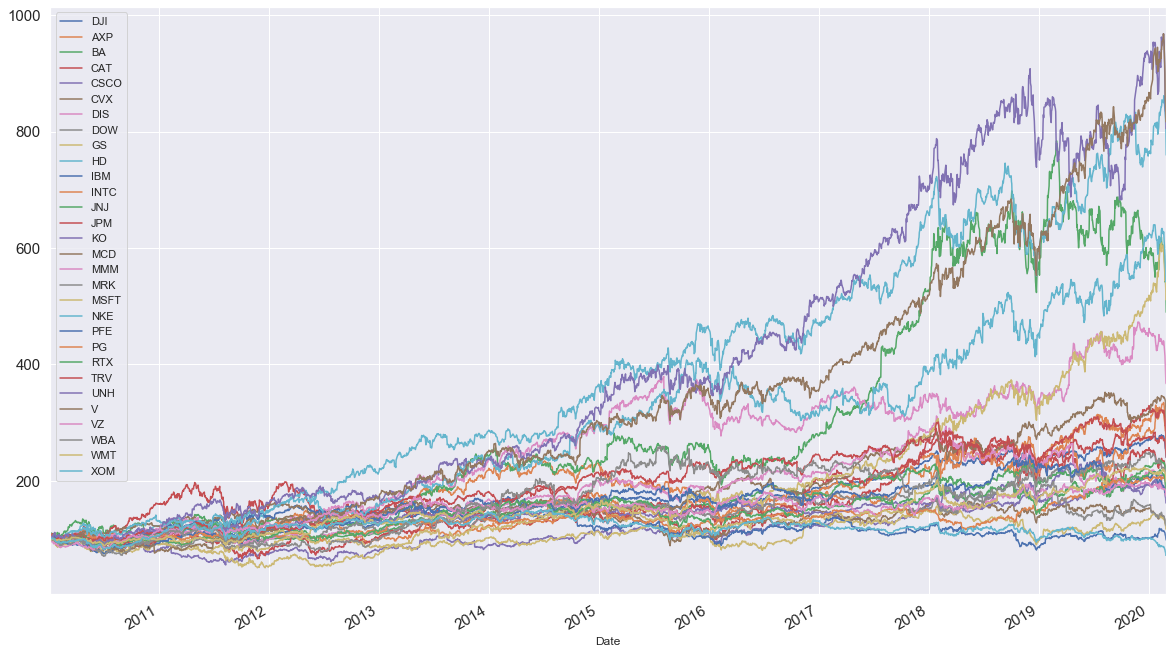

In [51]:
norm.drop(columns = 'AAPL').plot(figsize = (20,12),fontsize = 15)

In [61]:
ret = df.pct_change()

In [63]:
ret.describe()

,DJI,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,238.000000,2556.000000,...,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.000383,0.000991,0.000491,0.000747,0.000441,0.000315,0.000154,0.000598,-0.000638,0.000193,...,0.000290,0.000286,0.000312,0.000407,0.000924,0.000935,0.000273,0.000207,0.000328,-0.000044
std,0.008931,0.016320,0.014383,0.015797,0.017129,0.015894,0.013355,0.013355,0.021902,0.016408,...,0.011644,0.009462,0.012389,0.011283,0.014561,0.014799,0.010710,0.015896,0.010892,0.011957
min,-0.055464,-0.123558,-0.121009,-0.089290,-0.092208,-0.162107,-0.075402,-0.091708,-0.081301,-0.127910,...,-0.064174,-0.065665,-0.087619,-0.082869,-0.079675,-0.126722,-0.055064,-0.143374,-0.101832,-0.061882
25%,-0.003318,-0.006923,-0.006046,-0.007681,-0.008077,-0.006514,-0.006795,-0.005954,-0.013353,-0.008293,...,-0.005861,-0.004454,-0.005617,-0.005365,-0.006734,-0.006551,-0.005880,-0.007580,-0.005011,-0.006298
50%,0.000563,0.000891,0.000699,0.000844,0.000265,0.000447,0.000353,0.000665,0.000570,0.000399,...,0.000000,0.000323,0.000517,0.000716,0.000850,0.001322,0.000626,0.000275,0.000558,-0.000114
75%,0.004813,0.009832,0.007989,0.009473,0.009385,0.007869,0.007303,0.007491,0.011820,0.009011,...,0.006494,0.005281,0.006678,0.006596,0.008528,0.008599,0.006411,0.008724,0.005887,0.006676
max,0.049846,0.088741,0.090286,0.098795,0.081069,0.159505,0.063373,0.115437,0.062124,0.095437,...,0.070667,0.087986,0.053845,0.064018,0.081599,0.149973,0.076802,0.117856,0.108984,0.055159


In [67]:
def summary_ann(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] *252
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns = ['mean', 'std'], inplace = True)
    return summary

In [92]:
summary = summary_ann(ret)

In [93]:
summary = summary.merge(more_info.loc[:,['Ticker','Company']], how = 'left', left_index = True, right_on = 'Ticker').set_index('Company')

In [94]:
summary

,Return,Risk,Ticker
Company,,,
NaN,0.096431,0.141772,DJI
Apple Inc.,0.249694,0.259071,AAPL
American Express,0.123619,0.228322,AXP
Boeing,0.188143,0.250763,BA
Caterpillar Inc.,0.111209,0.271917,CAT
Cisco Systems,0.079443,0.252315,CSCO
Chevron Corporation,0.038861,0.211997,CVX
The Walt Disney Company,0.150651,0.211996,DIS
Dow Inc.,-0.160703,0.347687,DOW


In [96]:
summary.rename(index = {np.nan:'Dow Jones'}, inplace = True)

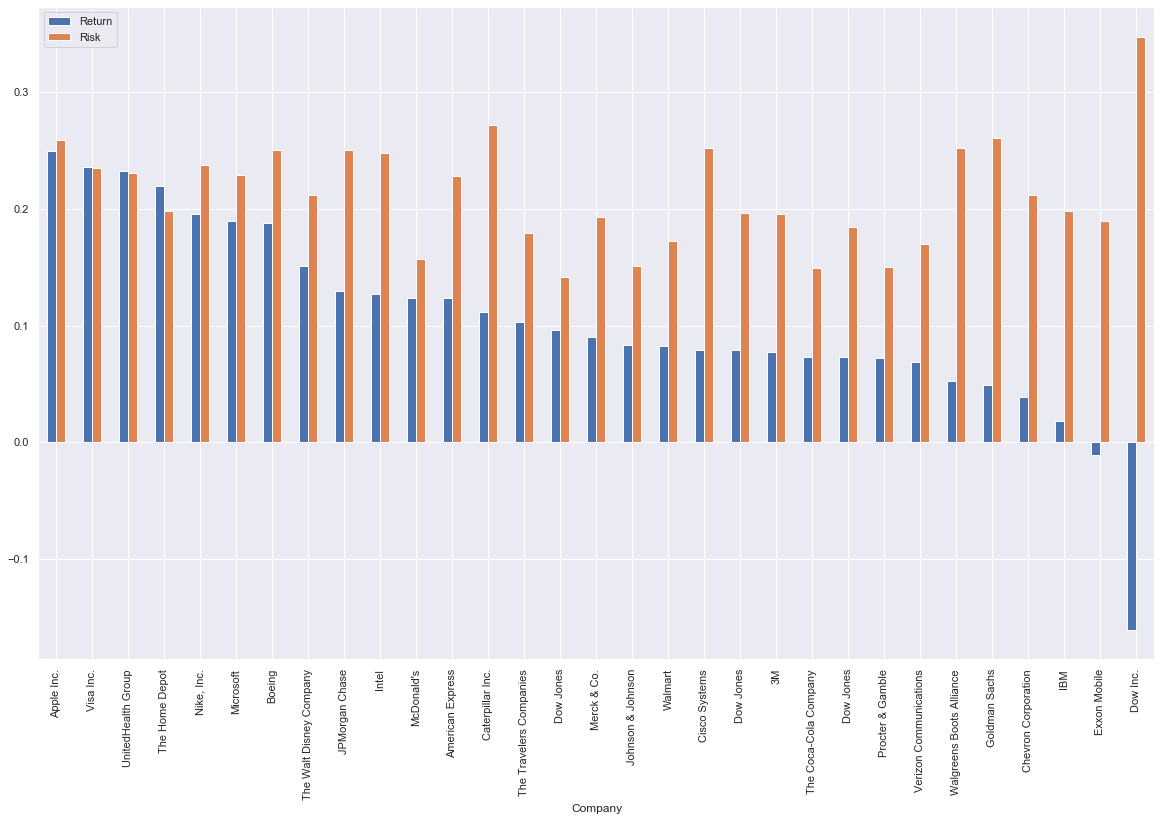

In [99]:
summary.sort_values(by = 'Return', ascending = False).plot(kind = 'bar', figsize = (20,12))

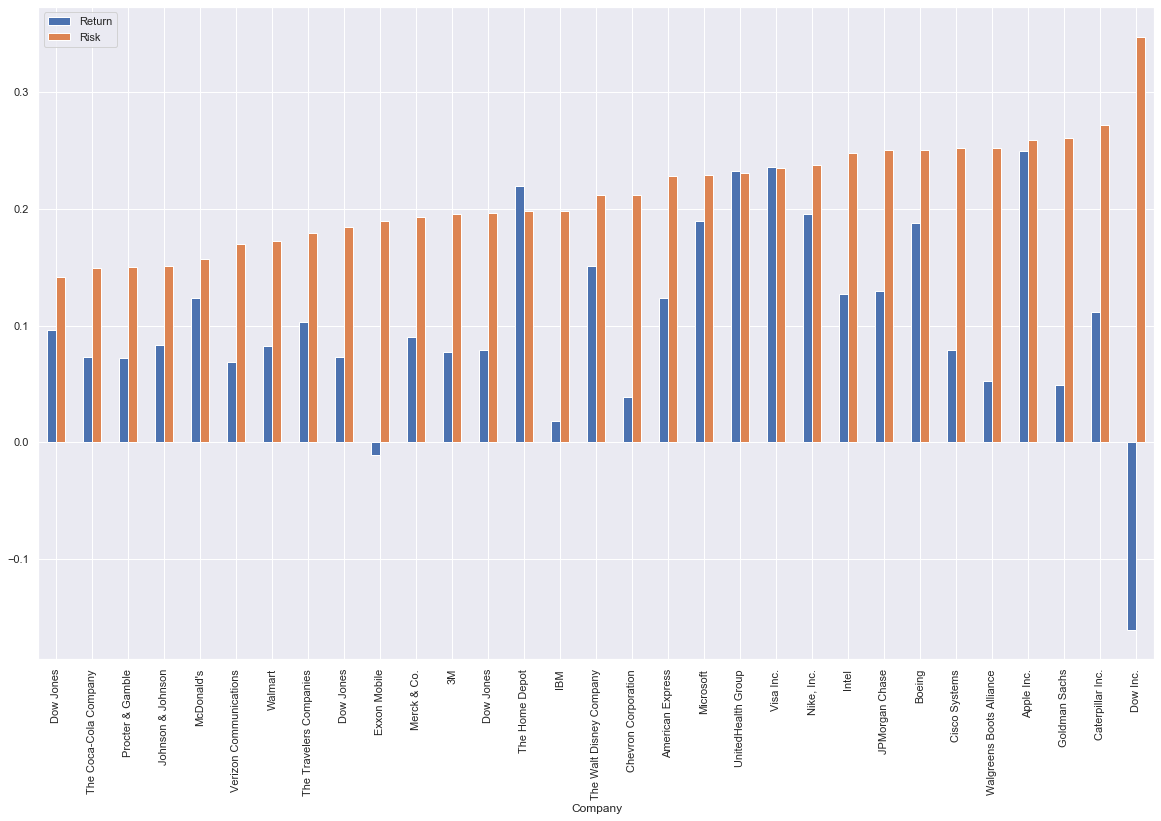

In [100]:
summary.sort_values(by = 'Risk', ascending = True).plot(kind = 'bar', figsize = (20,12))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


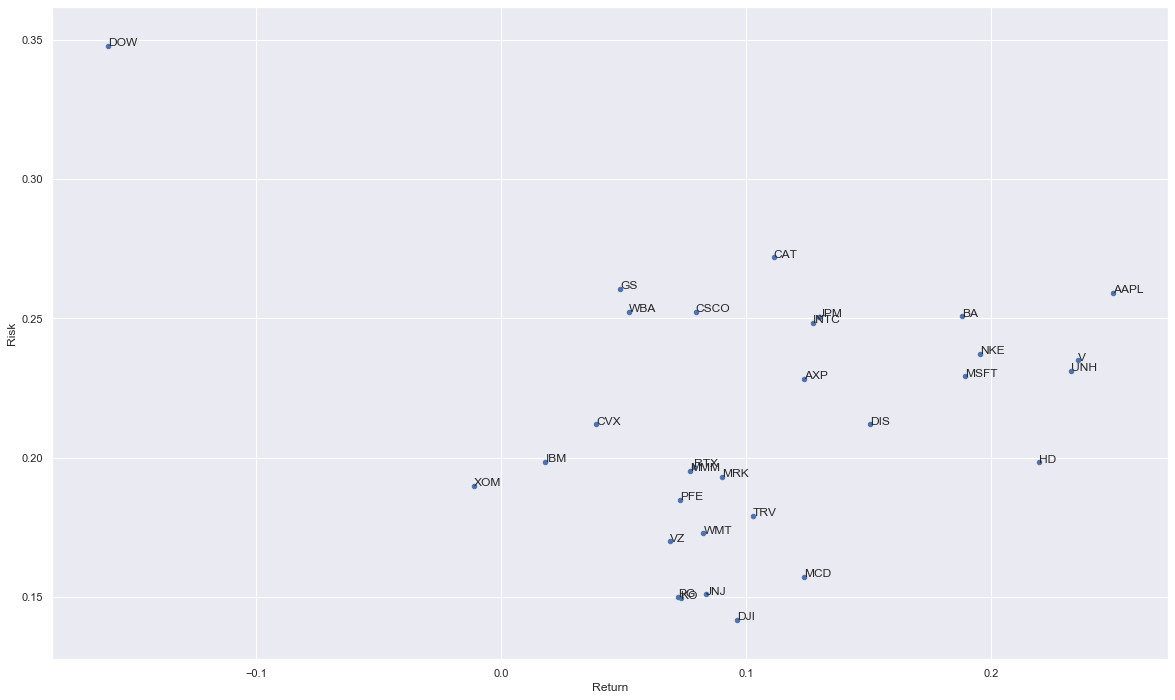

In [135]:
summary.plot('Return', 'Risk', kind = 'scatter', figsize = (20,12))
for i in range(len(summary)):
    plt.annotate(summary.iloc[i,2], (summary.iloc[i,0], summary.iloc[i,1]))

In [137]:
ret_corr = ret.corr()

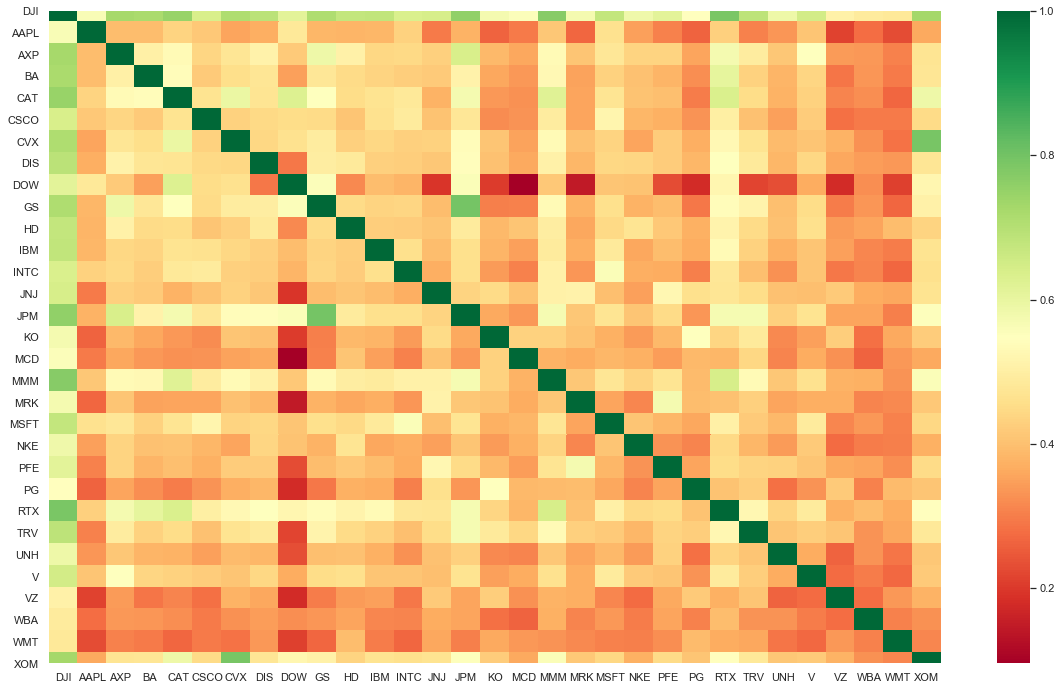

In [140]:
plt.figure(figsize = (20,12))
sns.heatmap(ret_corr, cmap = 'RdYlGn')
plt.show()

## Backtesting a simple Momentum Strategy

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 on any given day)

-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [145]:
dji['Return'] = dji.pct_change()

In [146]:
dji.dropna(inplace = True)

In [149]:
dji.rename(columns = {'Close': 'DJI_close', 'Return': 'DJI_return'}, inplace = True)

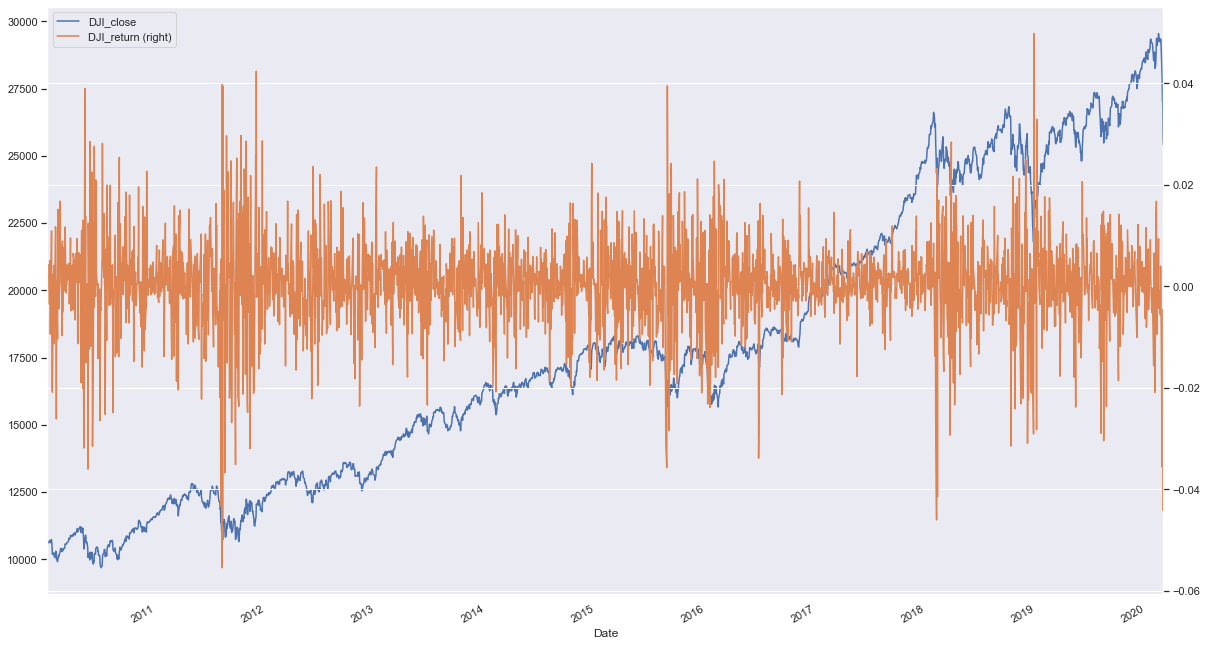

In [152]:
dji.plot(secondary_y = 'DJI_return', figsize = (20,12), mark_right = True)

In [155]:
dji['Position']= np.sign(dji.DJI_return)

In [160]:
dji['Strategy_ret'] = dji.Position.shift() * dji.DJI_return

In [164]:
dji.Strategy_ret.add(1, fill_value = 0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-02-24    0.782943
2020-02-25    0.807569
2020-02-26    0.811260
2020-02-27    0.847100
2020-02-28    0.858846
Name: Strategy_ret, Length: 2555, dtype: float64

In [166]:
dji['Strategy'] = dji.Strategy_ret.add(1, fill_value = 0).cumprod() * dji.iloc[0,0]

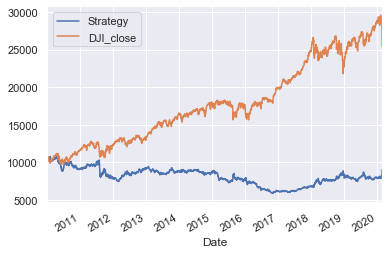

In [170]:
dji[['Strategy','DJI_close']].plot()

In [171]:
def summary_ann(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] * 252
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns = ['mean', 'std'], inplace = True)
    return summary

In [173]:
summary_ann(dji.iloc[:,[0,3,4]])

,Return,Risk
DJI_close,4.481392e+06,83970.235082
Strategy_ret,-4.938916e-03,0.141918
Strategy,2.056619e+06,17425.926504


## Backtesting a simple Contrarian Strategy

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ DJI tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into DJI tomorrow if today´s return was __negative__

In [182]:
dji['Contrarian_position'] =- np.sign(dji.DJI_return)

In [183]:
dji['Contrarian_return'] = dji.Contrarian_position.shift() * dji.DJI_return

In [186]:
dji['Contrarian'] = dji.Contrarian_return.add(1, fill_value = 0).cumprod()*dji.iloc[0,0]

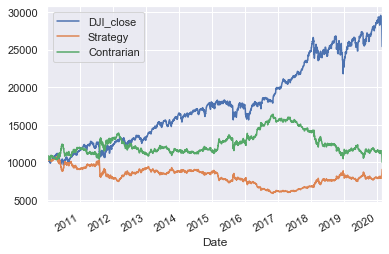

In [189]:
dji[['DJI_close', 'Strategy','Contrarian']].plot()

## More complex Strategies & Backtesting vs. Fitting

In [207]:
dji2 = df.loc['2010-01-01':,'Close'].to_frame()

In [208]:
dji2['DJI_return'] = dji2.Close.pct_change()

In [209]:
dji2.columns = ['DJI_close', 'DJI_return']

In [210]:
dji2.dropna(inplace = True)

In [220]:
dji2['Position'] = np.where(dji2.DJI_return > 0.01,-1,1)

In [221]:
dji2['Strategy_ret'] = dji2.Position.shift() * dji2.DJI_return

In [222]:
dji2['Strategy'] = dji2.Strategy_ret.add(1, fill_value = 0).cumprod()*dji2.iloc[0,0]

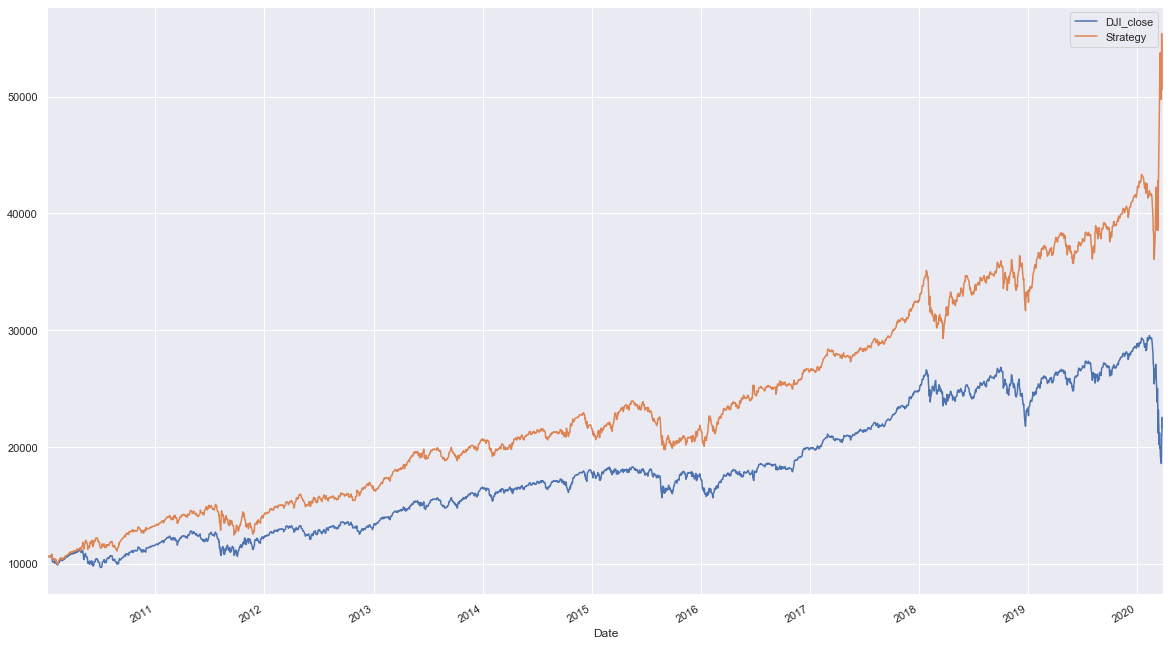

In [223]:
dji2[['DJI_close', 'Strategy']].plot(figsize = (20,12))

In [224]:
summary_ann(dji2[['DJI_return', 'Strategy_ret']])

,Return,Risk
DJI_return,0.087212,0.167896
Strategy_ret,0.174262,0.167659


Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>
- __Tax effects__ -> Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

## Simple Moving Averages (Part 1)

In [281]:
dji = df.loc['2010-01-01':,'Close'].to_frame()

In [282]:
dji['DJI_return'] = dji.Close.pct_change()

In [283]:
dji.columns = ['DJI_close', 'DJI_return']

In [284]:
dji.dropna(inplace = True)

In [285]:
dji['SMA50'] = dji.DJI_close.rolling(window = 50).mean()

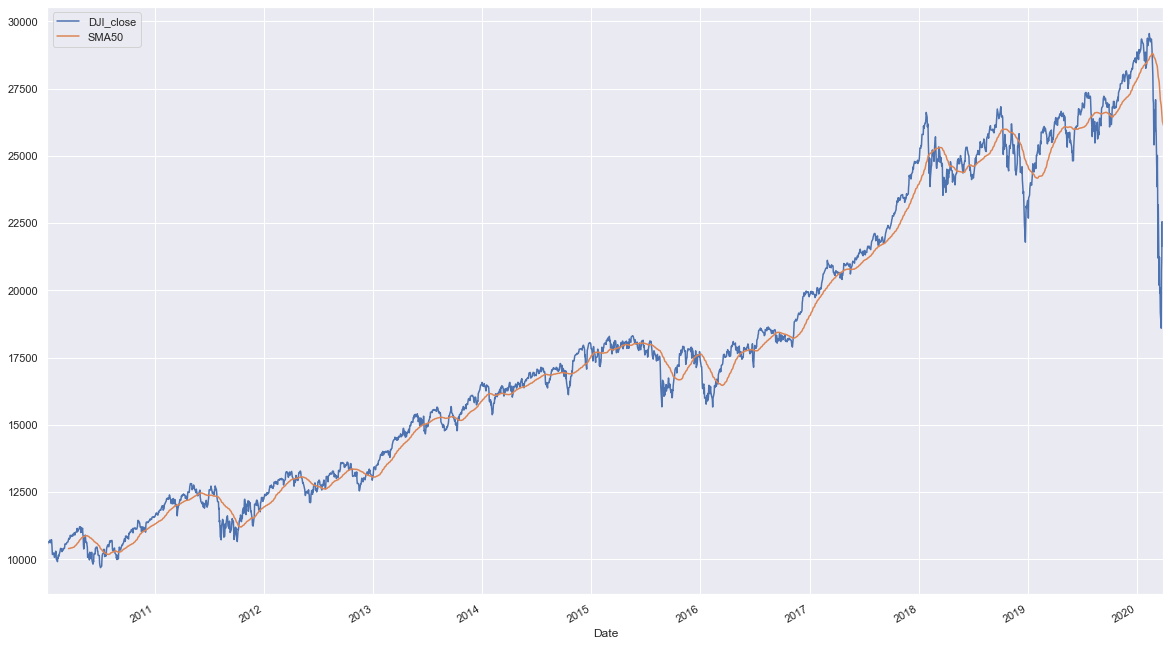

In [286]:
dji[['DJI_close', 'SMA50']].plot(figsize = (20,12))

In [287]:
dji['SMA200'] = dji.DJI_close.rolling(window = 200).mean()

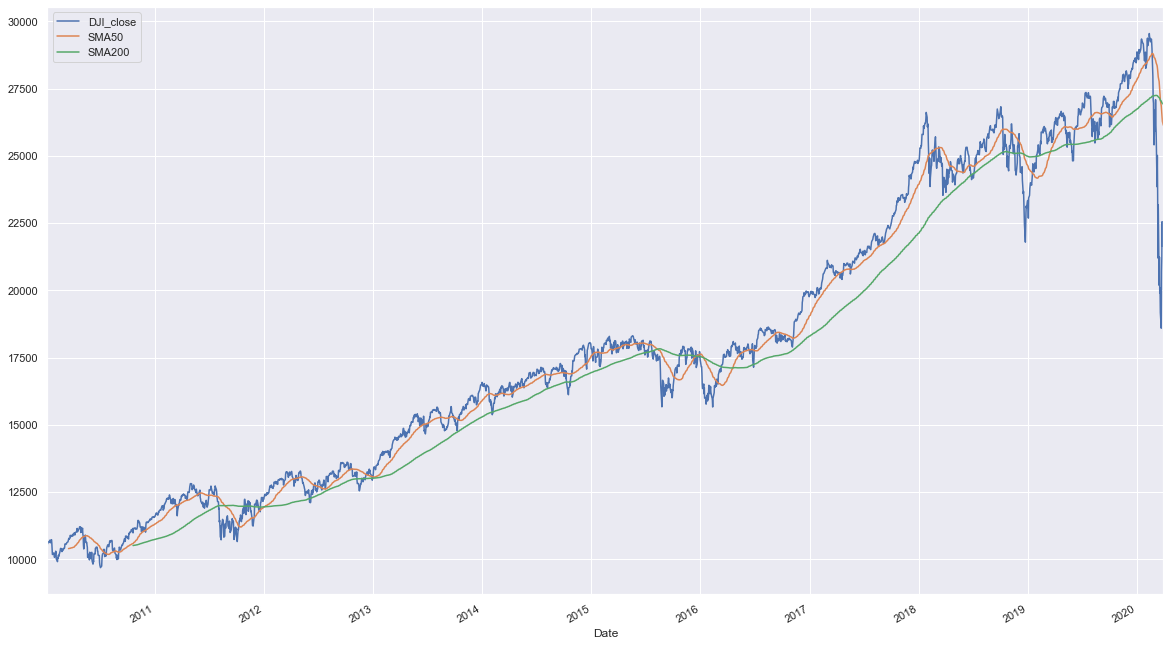

In [288]:
dji[['DJI_close', 'SMA50', 'SMA200']].plot(figsize = (20,12))

## Simple Moving Averages (Part 2)

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

In [289]:
dji['Position'] = np.where(dji.SMA50>dji.SMA200, 1, -1)

In [290]:
dji.dropna(inplace = True)

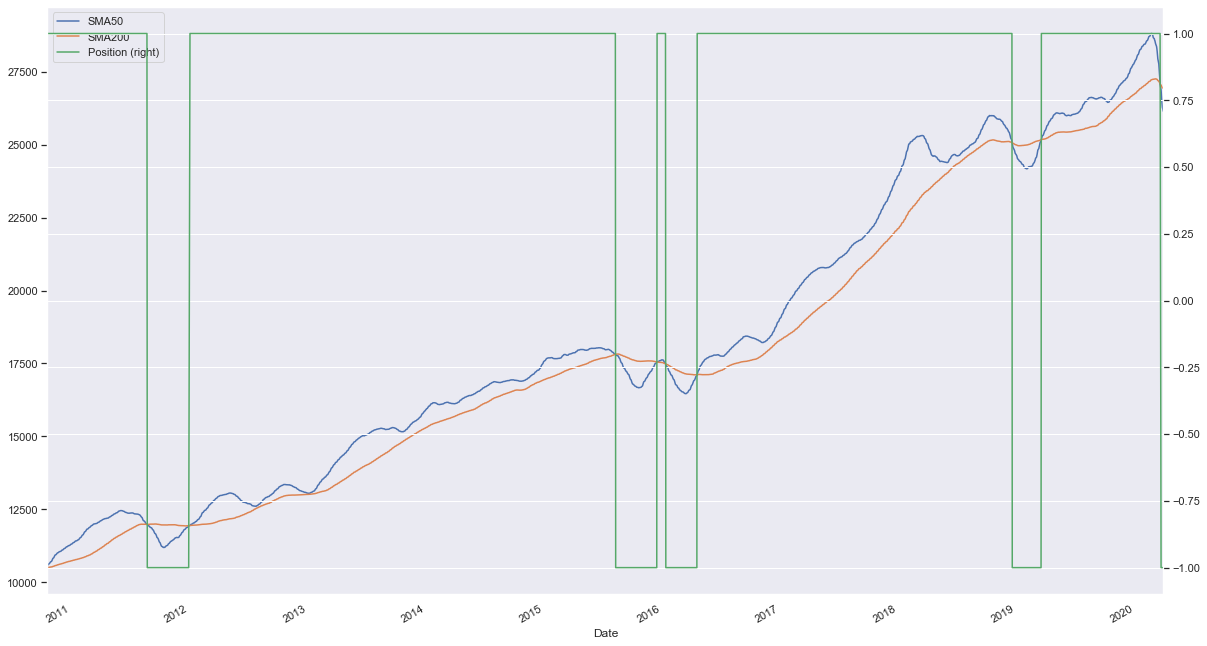

In [297]:
dji[['SMA50','SMA200', 'Position']].plot(secondary_y = 'Position', figsize =(20,12))

In [293]:
dji['Strategy_ret'] = dji.Position.shift()*dji.DJI_return

In [294]:
dji['Strategy'] = dji.Strategy_ret.add(1, fill_value = 0).cumprod()*dji.iloc[0,0]

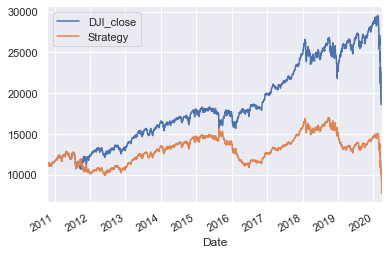

In [295]:
dji[['DJI_close', 'Strategy']].plot()

In [291]:
dji

,DJI_close,DJI_return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1


## Backtesting the Perfect Strategy (...in case you can predict the future...)

In [298]:
dji = df.loc['2010-01-01':,'Close'].to_frame()

In [299]:
dji['DJI_return'] = dji.Close.pct_change()

In [300]:
dji.columns = ['DJI_close', 'DJI_return']

In [301]:
dji.dropna(inplace = True)

In [302]:
dji['Position'] = np.sign(dji.DJI_return)

In [303]:
dji['Strategy_return'] = dji.Position * dji.DJI_return

In [305]:
dji['Strategy'] = dji.Strategy_return.add(1, fill_value = 0).cumprod()*dji.iloc[0,0]

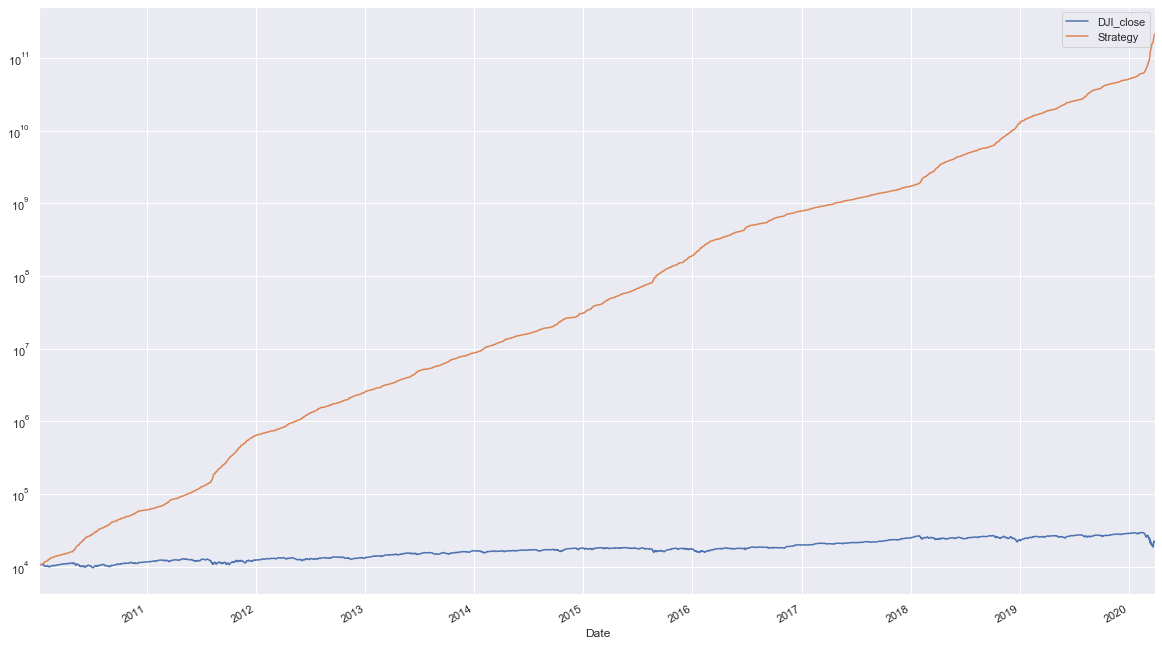

In [309]:
dji[['DJI_close', 'Strategy']].plot(figsize = (20,12), logy = True)

In [313]:
summary_ann(dji[['DJI_return', 'Strategy_return']])

,Return,Risk
DJI_return,0.087212,0.167896
Strategy_return,1.660910,0.131408
